<a href="https://colab.research.google.com/github/HidellaS/TensorflowCNNFunda/blob/main/Multi_class_classification_with_tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2025-02-25 05:00:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   128MB/s    in 4.2s    

2025-02-25 05:00:22 (119 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

['1671531.jpg']
Image Shape: (512, 512, 3)


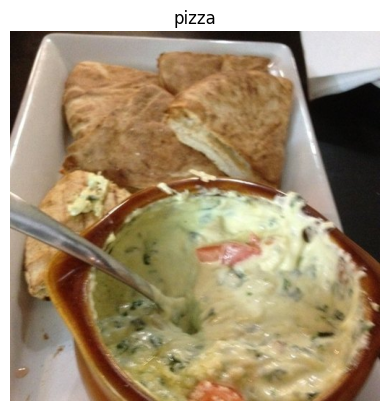

In [7]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [8]:
import tensorflow as tf

# Create datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)


normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


# Define augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.055),       # ~20 degrees (20/360 ≈ 0.055)
    tf.keras.layers.RandomTranslation(0.2, 0.2),   # width and height shifts (20% of the image)
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal")
])

# Option 1: Apply augmentation as part of the dataset pipeline
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_ds, # now 10 different classes
                        epochs=10,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - accuracy: 0.1260 - loss: 2.2863 - val_accuracy: 0.2236 - val_loss: 2.1247
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.2993 - loss: 1.9984 - val_accuracy: 0.2708 - val_loss: 2.0747
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.4886 - loss: 1.5167 - val_accuracy: 0.2300 - val_loss: 2.4787
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.7195 - loss: 0.8692 - val_accuracy: 0.2156 - val_loss: 3.6601
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.8823 - loss: 0.3656 - val_accuracy: 0.2116 - val_loss: 5.7799
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9407 - loss: 0.1760 - val_accuracy: 0.1992 - val_loss: 6.7943
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9586 - loss: 0.1342 - val_accuracy: 0.2064 - val_loss: 7.5568
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9743 - loss: 0.0897 -

In [11]:
model_1.evaluate(test_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1914 - loss: 8.4514


[8.664159774780273, 0.19760000705718994]

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

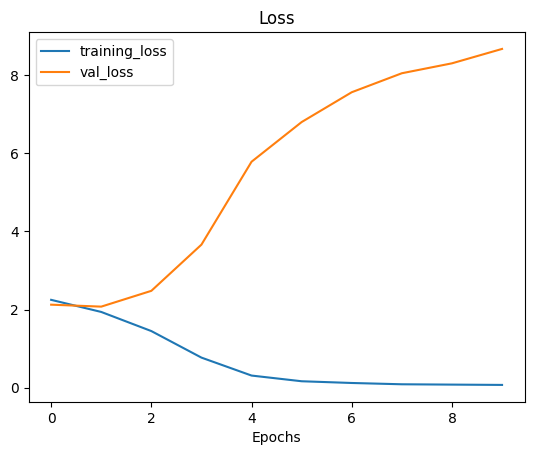

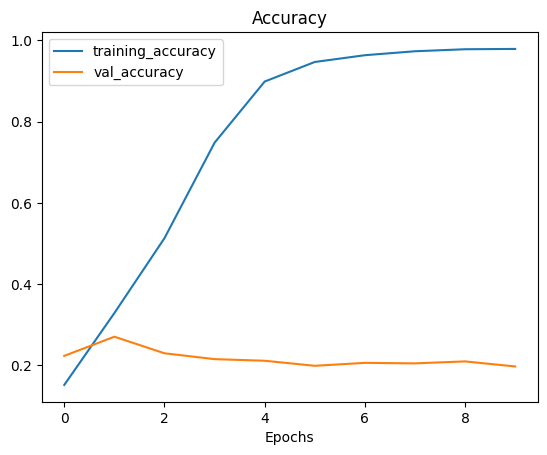

In [14]:
plot_loss_curves(history_1)

In [15]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_ds,
                          epochs=10,
                          steps_per_epoch=len(train_ds),
                          validation_data=test_ds,
                          validation_steps=len(test_ds))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.1681 - loss: 2.4210 - val_accuracy: 0.2744 - val_loss: 2.0366
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.4040 - loss: 1.7690 - val_accuracy: 0.2664 - val_loss: 2.0649
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.6324 - loss: 1.1587 - val_accuracy: 0.2652 - val_loss: 2.4883
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.8138 - loss: 0.6190 - val_accuracy: 0.2560 - val_loss: 3.0422
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9197 - loss: 0.3036 - val_accuracy: 0.2564 - val_loss: 3.8130
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9746 - loss: 0.1219 - val_accuracy: 0.2548 - val_loss: 4.4669
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9844 - loss: 0.0846 - val_accuracy: 0.2456 - val_loss: 5.0848
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9868 - loss: 0.0703 - val_accurac

In [16]:
model_2.evaluate(test_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2330 - loss: 6.0061


[5.927717208862305, 0.24160000681877136]

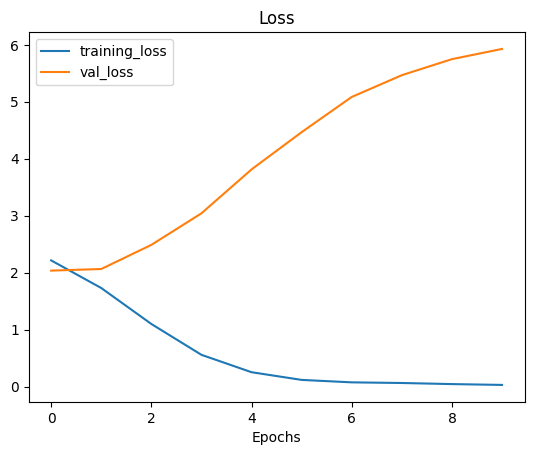

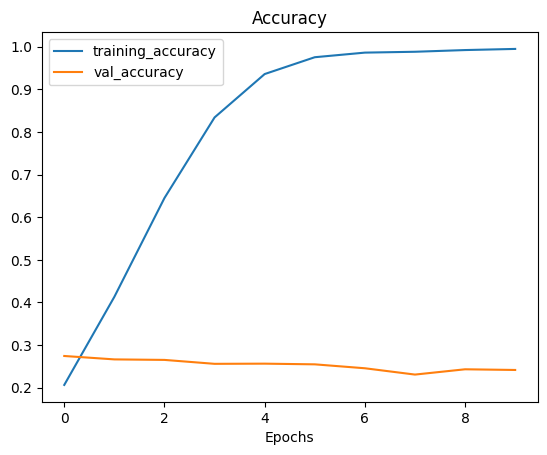

In [17]:
plot_loss_curves(history_2)